# Kmeans by observations

In [235]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [245]:
data = pd.read_csv("eigg.csv") 
data.head()

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NBN Atlas record ID,Occurrence ID,Licence,Rightsholder,Scientific name,Common name,Species ID (TVK),Taxon Rank,Occurrence status,Start date,...,Class,Order,Family,Genus,OSGR 100km,OSGR 10km,OSGR 2km,OSGR 1km,Country,State/Province
0,baa00bca-011f-43bf-b3e2-4ea60f04646e,3783,CC-BY-NC,Buglife,Meloe violaceus,Violet Oil-beetle,NBNSYS0000024952,species,present,28/06/1905,...,Insecta,Coleoptera,Meloidae,Meloe,NM,NM48,NM48T,NM4686,United Kingdom,Scotland
1,f70cff95-1d0d-4dbd-bece-10239bad0a93,232100298,CC0,NaN,Rhantus suturellus,NaN,NBNSYS0000007613,species,present,11/09/1910,...,Insecta,Coleoptera,Dytiscidae,Rhantus,NM,NM48,NM48N,NM4486,United Kingdom,Scotland
2,f450fbce-7e45-4822-ada4-0591c7ea0b48,232100297,CC0,NaN,Gyrinus substriatus,NaN,NBNSYS0000007643,species,present,11/09/1910,...,Insecta,Coleoptera,Gyrinidae,Gyrinus,NM,NM48,NM48N,NM4486,United Kingdom,Scotland
3,e6ceb7fa-7437-490f-a93e-862872492660,232100292,CC0,NaN,Enochrus fuscipennis,NaN,NHMSYS0001718079,species,present,11/09/1910,...,Insecta,Coleoptera,Hydrophilidae,Enochrus,NM,NM48,NM48N,NM4486,United Kingdom,Scotland
4,e6649320-d64b-4c29-8393-5565655f0ff9,232100296,CC0,NaN,Boreonectes multilineatus,NaN,NHMSYS0021125444,species,present,11/09/1910,...,Insecta,Coleoptera,Dytiscidae,Boreonectes,NM,NM48,NM48N,NM4486,United Kingdom,Scotland


In [246]:
df = data[['Latitude (WGS84)', 'Longitude (WGS84)']]

df = df.dropna(subset=['Latitude (WGS84)'])
df = df.dropna(subset=['Longitude (WGS84)'])
df["Latitude (WGS84)"] = df["Latitude (WGS84)"].astype(np.float32)
df["Longitude (WGS84)"] = df["Longitude (WGS84)"].astype(np.float32)

df["Longitude (WGS84)"] = abs(df["Longitude (WGS84)"] + 6)
df["Latitude (WGS84)"] = df["Latitude (WGS84)"] - 56

In [238]:
latBoundaries = (min(df["Latitude (WGS84)"]),max(df["Latitude (WGS84)"]))
lonsBoundaries = (min(df['Longitude (WGS84)']),max(df['Longitude (WGS84)']))

In [247]:
res = list(zip(df["Latitude (WGS84)"], df['Longitude (WGS84)']))
kmeans = KMeans(n_clusters=10, random_state=0).fit(res)
centers = kmeans.cluster_centers_

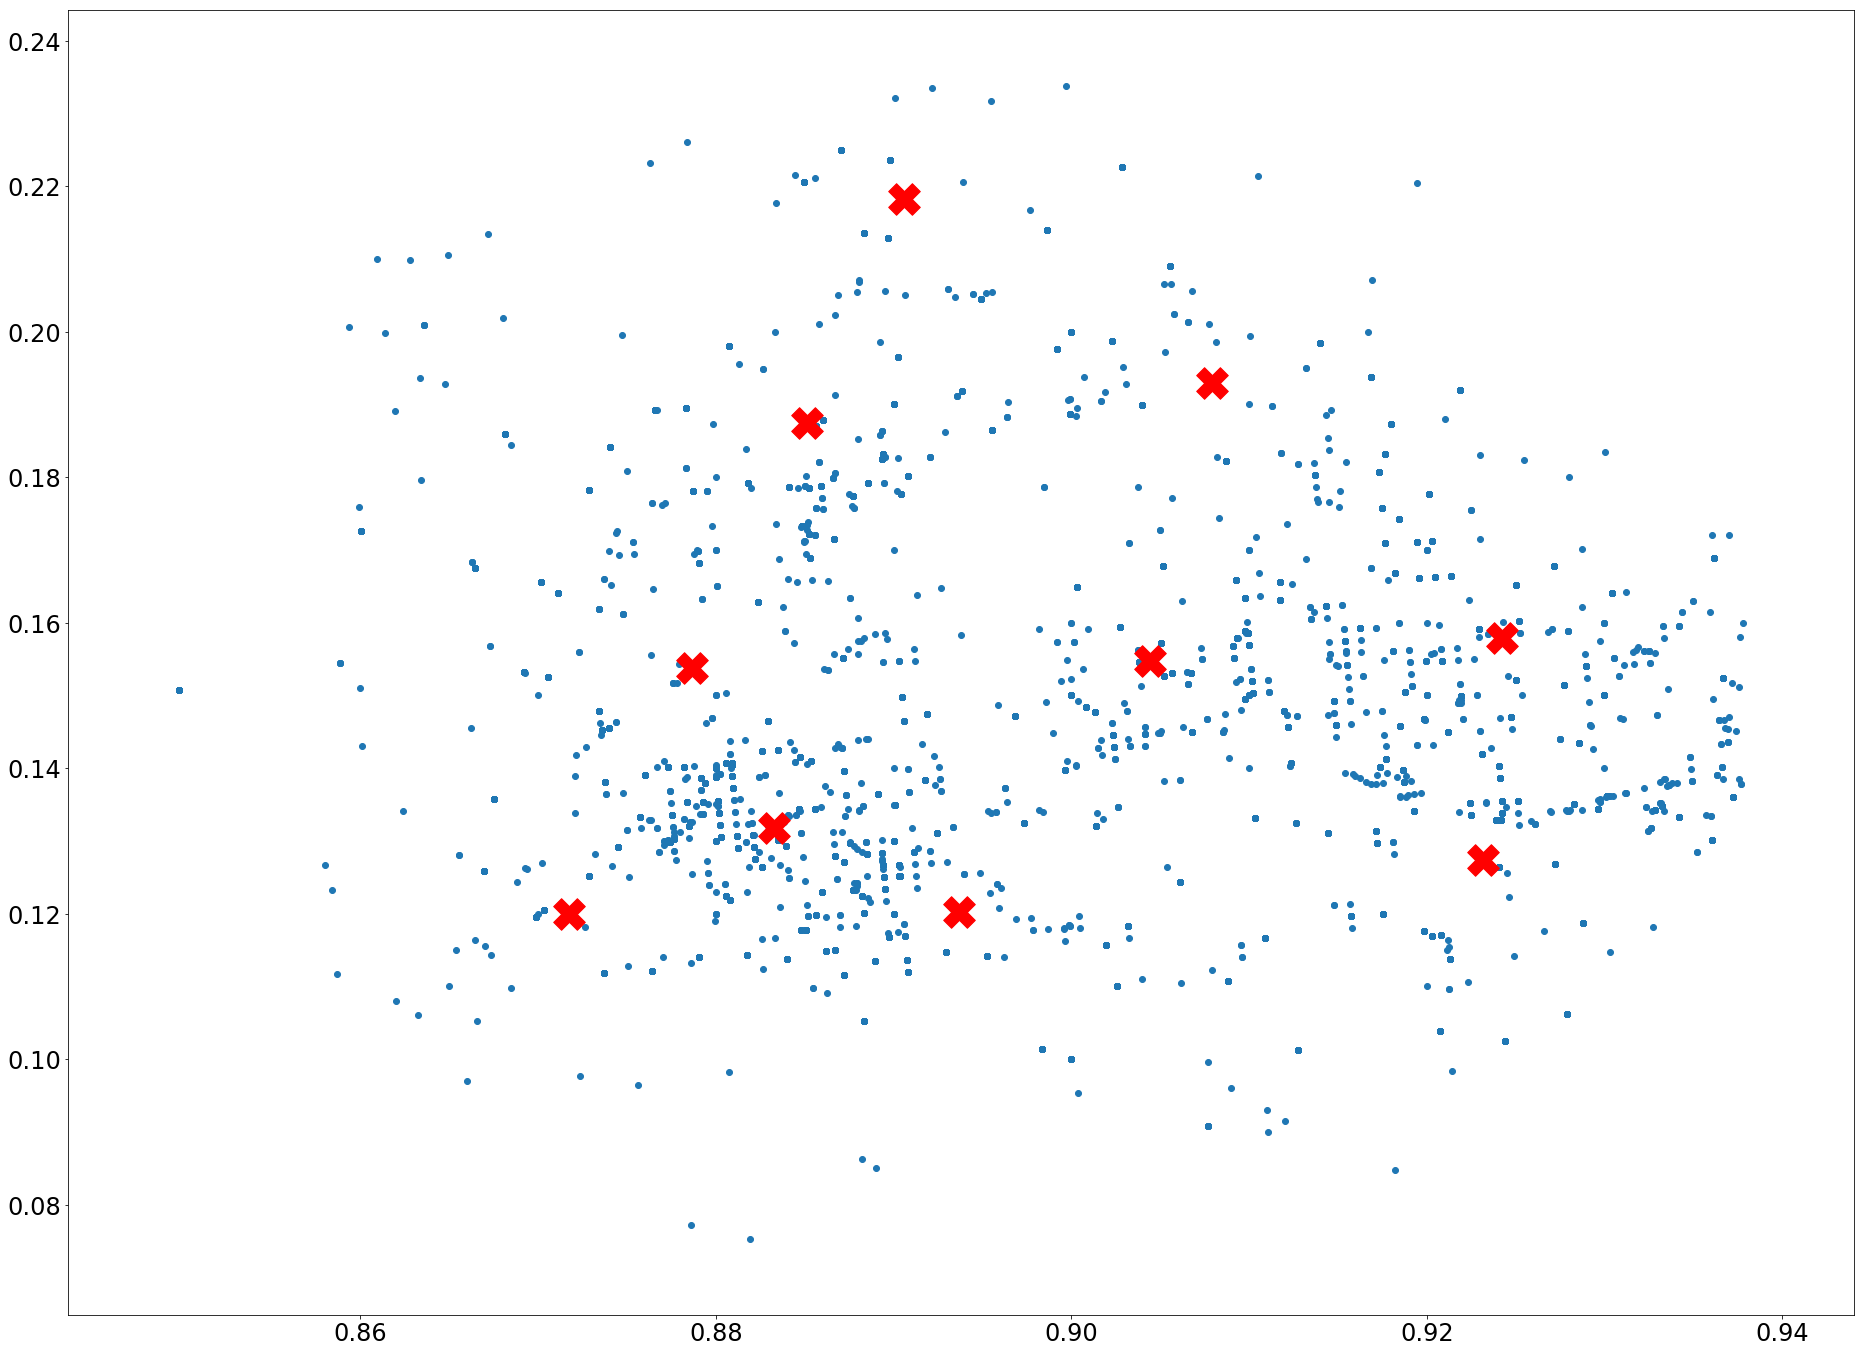

In [248]:
fig,ax = plt.subplots(1,1)
ax.scatter(df["Latitude (WGS84)"], df['Longitude (WGS84)'])

ax.scatter(centers[:,0],centers[:,1],c="red",marker="X", s=1000)

In [241]:
centers_resolved = list(map(lambda x: [x[0]+56,-1*x[1] - 6], centers))
df["Longitude (WGS84)"] = -1*(df["Longitude (WGS84)"]) - 6
df["Latitude (WGS84)"] = df["Latitude (WGS84)"] + 56
centers_resolved,centers

([[56.884513456366356, -6.1302566200643591],
  [56.888486222642818, -6.1894039348092642],
  [56.913750455564426, -6.1496295440371922]],
 array([[ 0.88451346,  0.13025662],
        [ 0.88848622,  0.18940393],
        [ 0.91375046,  0.14962954]]))

In [243]:
def generateMappableNetwork(processedCoordsListOne,processedCoordsListTwo, filename):
    #linkMatrix = list(map(lambda x: [processedCoordsList[x[0]],processedCoordsList[x[1]]],G.edges()))
    locs1 = list(map(lambda x: {"location": ",".join([str(x[0]),str(x[1])]),"desc":"", "size":0.03},processedCoordsListOne[1:10000]))
    locs2 = list(map(lambda x: {"location": ",".join([str(x[0]),str(x[1])]),"desc":"", "size":0.03},processedCoordsListTwo))
    building = {}
    building["result"] = [{"plots":{"locs":locs1}, "configs": {"marker": './fullColMarkers/marker2.png'}}]
    building["result"].append({"plots":{"locs":locs2}, "configs": {"marker": './fullColMarkers/marker73.png'}})
    content = json.dumps(building)
        
    with open(filename, "a") as f:
        f.write(content)
        
generateMappableNetwork(list(zip(df["Latitude (WGS84)"],df['Longitude (WGS84)'])),centers_resolved,"observationClusters.txt")